# Online Social Platform

### Author: yokaiAG

### 8 June 2018

We analyse the influence of users in a generic online social platform. 

In such platform, there are $N$ users in total. Each user $n$ is considered as a virtual node and has a Newsfeed and a Wall. Suppose the Newsfeed of size $M$ and the Wall of size $K$. Furthermore, each user has a set of leaders, $L^{(n)}$, and he/she can be the leader of others. The Newsfeed of $n$ is refreshed instantaneously with posts published on the Walls of his Leaders. The user visits his Newsfeed and chooses among the currently available posts to re-post on his own Wall with rate $\mu^{(n)}\geq 0$ [posts/unit-time]. Additionally, he produces own posts on his Wall with rate $\lambda^{(n)}\geq 0$. These posts are marked on their production by the user-author index $(n)$.

**Assumptions:** The choice of which post to share on one's Wall and which post to evict when a new post arrives is uniformly random, among the present posts on the Wall and the Newsfeed. Also, both post-feed processes per user are assumed Poisson.

Consider a particular user $i$. The steady-state probability to find posts from user $i$ on the Newsfeed and Wall of user $n$ is the tuple $(p_i^{(n)},q_i^{(n)})$. With this, we form the steady state column-vectors

$Pvec(i):=(Pvec(1,i),\ldots,Pvec(N,i))=(p_i^{(1)},\ldots,p_i^{(n)})$, and

$Qvec(i):=(Qvec(1,i),\ldots,Qvec(N,i))=(q_i^{(1)},\ldots,q_i^{(n)})$.

These are the steady-state vectors for posts of origin $(i)$ on all the Newsfeeds and Walls of users. 

### Linear System solution

To find the values of the steady-state vectors $Pvec(i)$ and Qvec(i), one needs to solve the following linear system:

    (1) Pvec(i) = A.Pvec(i) + b(i)

    (2) Qvec(i) = C.Pvec(i) + d(i).

In the above $A$, $C$ are $N\times N$ matrices and $b(i)$, $d(i)$ are $N\times 1$ column vectors.

$A(j,k) = \frac{\mu^{(k)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(k\in L^{(j)})$,

$b(j,i) = \frac{\lambda^{(i)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(i\in L^{(j)})$,

$C(j,i) = \frac{\mu^{(j)}}{\lambda^{(j)}+\mu^{(j)}}\mathbf{1}(j==i)$,

$d(j,i) = \frac{\lambda^{(i)}}{\lambda^{(i)}+\mu^{(i)}}\mathbf{1}(j==i)$.

## Implementation

In [2]:
%pylab inline
import math

Populating the interactive namespace from numpy and matplotlib


## 1. Input Graphs

We would first like to generate the input graphs for our Social platform. 

We propose three graph categories:
(a) Ring Graph, (b) Grid, (c) Erdos-Renyi random graph.

For each graph, we need to define: (1) number of users $N$, (2) self- and re-post activity rate N-vectors, $Lvec$ and $Mvec$ (3) Leader graph (either NxN or list). 

For the special case of Ring, a radius $R$ should also be defined, which determines the number of leaders per user.

### A. Ring Graph

First we determine the symmetric ring graph. Each node follows $R$ users at his right and left, so that in total he has $2R$ leaders. Obviously, $2R<N$.

In [3]:
# INPUT RADIUS
# defines radius in ring for each user
# Radius scenario 1: random with maximum 2R < N
N = 9
Rhigh = int(N/2)
Rvec1 = np.random.randint(0,Rhigh+1,N)
R = 1
Rvec2 = R*np.ones(N)
Rvec2 = Rvec2.astype(int)
Rvec3 = list(Rvec2)
Rvec3[0] = 2
Rvec3 = np.asarray(Rvec3)
Rvec3 = Rvec3.astype(int)
#
print("Rvec1=",Rvec1,"\n")
print("Rvec2=",Rvec2,"\n")
print("Rvec3=",Rvec3,"\n")

Rvec1= [0 3 0 3 3 2 2 1 0] 

Rvec2= [1 1 1 1 1 1 1 1 1] 

Rvec3= [2 1 1 1 1 1 1 1 1] 



In [4]:
def ring_graph(N, Rvec, lead=1, sym=1):
    # Produces a list of Leaders, i.e. Lead[j] is the list of leaders for node j.
    #
    # Option lead =1: Vector Rvec is for leaders (Rvec[n] is the list of leaders for node n)
    # Option lead =0: Vector Rvec is for followers (Rvec[n]) is the list of followers for node n)
    #
    # Option sym =1: case of symmetric leaders R right and R left of a user
    # Option sym =0: non-symmetric leaders 2R at the right only.
    #
    Lead = list()
    #
    if lead==1 and sym==1:
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            f.extend((j-(np.arange(Rvec[j])+1))%N)
            Lead.append(f)
    elif lead==1 and sym==0:
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            Lead.append(f)
    elif lead==0 and sym==1:
        for j in range(0,N):
            f = list()
            Lead.append(f)
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            f.extend((j-(np.arange(Rvec[j])+1))%N)
            for n in range(len(f)):
                Lead[f[n]].append(j)
    elif lead==0 and sym==0:
        for j in range(0,N):
            f = list()
            Lead.append(f)
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            for n in range(len(f)):
                Lead[f[n]].append(j)
            
    return Lead

In [5]:
LeadRing = ring_graph(N,Rvec2,lead=1,sym=1)
print(Rvec2)
print(LeadRing)

[1 1 1 1 1 1 1 1 1]
[[1, 8], [2, 0], [3, 1], [4, 2], [5, 3], [6, 4], [7, 5], [8, 6], [0, 7]]


We will now draw the produced directed Leader Graph.

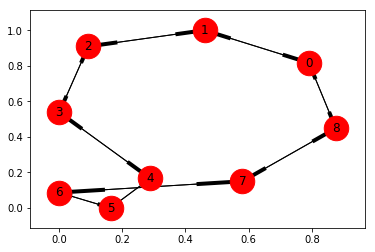

In [6]:
import networkx as nx
Gring=nx.DiGraph()
for n in range(N):
    ln = list()
    ln = LeadRing[n]
    for j in range(len(ln)):
        Gring.add_edge(ln[j],n)
        
nx.draw_networkx(Gring,arrows=True,with_labels=True,node_size=600,node_color='r')

### B. Grid Graph

In the Grid graph, every node has 4 leaders, except the nodes on the 4 vertices of the Grid who have 2 leaders and the nodes on the edges who have 3.

The size of the grid graph should be such that $\sqrt{N}$ is a postive integer.

In [7]:
def grid_graph(N):
    #
    dim1 = math.sqrt(N)
    #
    # Check validity of Grid size
    if np.abs(dim1-int(dim1))>0:
        return print("not valid graph size N\n")
    #
    dim1 = int(dim1)
    #
    # If size is correct, then produce a list of Leaders.
    # Nodes are indexed from top-left ("0") to bottom-right ("N-1")
    # and in each row the indexing increased from left to right.
    #
    Lead = [list() for j in range(N)]
    #
    # Internal nodes with 4 leaders each.
    for n in range(1,dim1-1):
        for m in range(1,dim1-1):
            indx = dim1*n+m
            Lead[indx].extend([dim1*(n+1)+m, dim1*(n-1)+m, dim1*n+m+1, dim1*n+m-1 ])
    # Four vertices with 2 leaders each.
    Lead[0].extend([1, dim1])
    Lead[dim1-1].extend([dim1-2,dim1*2-1])
    Lead[dim1*(dim1-1)].extend([dim1*(dim1-1)+1,dim1*(dim1-2)])
    Lead[N-1].extend([N-2,dim1*(dim1-1)-1])
    # Remaining nodes on the four edges, not vertices.
    # Top
    for m in range(1,dim1-1):
        Lead[m].extend([m-1,m+1,dim1+m])
    # Bottom
    for m in range(1,dim1-1):
        Lead[dim1*(dim1-1)+m].extend([dim1*(dim1-1)+m-1,dim1*(dim1-1)+m+1,dim1*(dim1-2)+m])
    # Left
    for n in range(1,dim1-1):
        Lead[dim1*n].extend([dim1*n+1,dim1*(n-1),dim1*(n+1)])
    # Right
    for n in range(1,dim1-1):
        Lead[dim1*(n+1)-1].extend([dim1*(n+1)-2,dim1*(n)-1,dim1*(n+2)-1])

    return Lead

In [8]:
LeadGrid = grid_graph(N)
print(LeadGrid)

[[1, 3], [0, 2, 4], [1, 5], [4, 0, 6], [7, 1, 5, 3], [4, 2, 8], [7, 3], [6, 8, 4], [7, 5]]


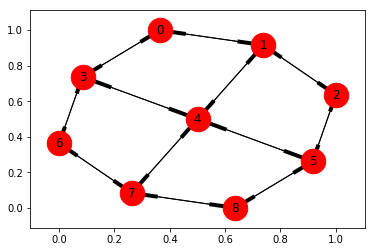

In [9]:
Ggrid=nx.DiGraph()
for n in range(N):
    ln = list()
    ln = LeadGrid[n]
    for j in range(len(ln)):
        Ggrid.add_edge(ln[j],n)

pos=nx.spring_layout(Ggrid,iterations=100)
nx.draw_networkx(Ggrid,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

## 2. Performance evaluation

### General input 
We first define the general input (1) and (2) related to size and activity.

In [10]:
# GENERAL INPUT (N, Lvec, Mvec)
print(N) # network size SEE ABOVE
#
# ACTIVITY
# Scenario case 1: random activity
Amax = 10 #maximum activity rate in the random choice (case 1)
Lvec1 = np.random.uniform(0,Amax, N)
Mvec1 = np.random.uniform(0,Amax, N)
#
Lvec1 = np.round(Lvec1, 5)
Mvec1 = np.round(Mvec1, 5)
# Scenario case 2: symmetric activity
lam = 1.
mu = 1
Lvec2 = lam*np.ones(N, np.float64)
Mvec2 = mu*np.ones(N, np.float64)
#
# Scenario case 3: asymmetric activity for 1 user
lam1 = 10
mu1 = 0.5
Lvec3 = list(Lvec2)
Mvec3 = list(Mvec2)
Lvec3[0] = lam1
Mvec3[0] = mu1
Lvec3 = np.asarray(Lvec3)
Mvec3 = np.asarray(Mvec3)
#
print("Lvec1=",Lvec1,"\n","Mvec1=",Mvec1,"\n")
print("Lvec2=",Lvec2,"\n","Mvec2=",Mvec2,"\n")
print("Lvec3=",Lvec3,"\n","Mvec3=",Mvec3,"\n")

9
Lvec1= [ 9.35145  0.15629  7.108    5.58883  7.25765  0.10301  2.00839  2.86734
  1.16939] 
 Mvec1= [ 1.08614  7.98603  7.11104  3.58302  1.90218  0.47515  9.09261  2.71049
  3.16071] 

Lvec2= [ 1.  1.  1.  1.  1.  1.  1.  1.  1.] 
 Mvec2= [ 1.  1.  1.  1.  1.  1.  1.  1.  1.] 

Lvec3= [ 10.   1.   1.   1.   1.   1.   1.   1.   1.] 
 Mvec3= [ 0.5  1.   1.   1.   1.   1.   1.   1.   1. ] 



**CURRENT INPUT PARAMETERS**

In [11]:
print(N)
Lvec = Lvec3
print(Lvec)
Mvec = Mvec3
print(Mvec)
Rvec = Rvec3
print(Rvec)
Lead = ring_graph(N,Rvec,lead=1,sym=1)
#Lead = grid_graph(N)
print(Lead)

9
[ 10.   1.   1.   1.   1.   1.   1.   1.   1.]
[ 0.5  1.   1.   1.   1.   1.   1.   1.   1. ]
[2 1 1 1 1 1 1 1 1]
[[1, 2, 8, 7], [2, 0], [3, 1], [4, 2], [5, 3], [6, 4], [7, 5], [8, 6], [0, 7]]


From the Linear System solution, one realises that it is necessary to first populate the matrices $A$ and $C$, which are relevant for any solution process of the system. 

**Note** As a first approach, we will actually keep in memory entire $N\times N$ matrices, an approach that limits our possibilities related to social platform dimension. Still a matrix with a sufficient number of users e.g. $N=10^3$ or even $N=10^4$ is feasible. For larger networks, memory will play an issue and other techniques should be developped. 

In [12]:
def fill_A(N,Lvec,Mvec,Lead):
    A = np.zeros((N,N))
    # We consider that Lead[j] contains the set of leaders of node j.
    #
    Som = np.zeros(N)
    for j in range(N):
        Som[j] = sum(Lvec[Lead[j]]+Mvec[Lead[j]])
        for n in range(len(Lead[j])):
            k = Lead[j][n]
            A[j,k] = Mvec[k]/Som[j]
    return A

In [13]:
A = fill_A(N,Lvec,Mvec,Lead)
print(A)

[[ 0.     0.125  0.125  0.     0.     0.     0.     0.125  0.125]
 [ 0.04   0.     0.08   0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.25   0.     0.25   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.25   0.     0.25   0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.25   0.     0.25   0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.25   0.     0.25   0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.25   0.     0.25   0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.25   0.     0.25 ]
 [ 0.04   0.     0.     0.     0.     0.     0.     0.08   0.   ]]


In [14]:
def fill_C(N,Lvec,Mvec):
    C = np.zeros((N,N))
    # C is diagonal.
    #
    for j in range(N):
        if Lvec[j]+Mvec[j]>0:
            C[j][j] = Mvec[j]/(Lvec[j]+Mvec[j])
    return C

In [15]:
C = fill_C(N,Lvec,Mvec)
print(C)

[[ 0.04761905  0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.5         0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.5         0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.5         0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.5         0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.5         0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.5
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.5         0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.5       ]]


We continue by including the column vectors $b_i$ and $d_i$, for a specific label $i$.

In [16]:
def fill_bi(i,N,Lvec,Mvec,Lead):
    bi = np.zeros(N)
    for j in range(N):
        if i in Lead[j]:
            bi[j] = Lvec[i]/sum(Lvec[Lead[j]]+Mvec[Lead[j]])
    return bi

In [17]:
bi = fill_bi(0,N,Lvec,Mvec,Lead)
print(bi)

[ 0.   0.8  0.   0.   0.   0.   0.   0.   0.8]


In [18]:
def fill_di(i,N,Lvec,Mvec):
    di = np.zeros(N)
    di[i] = Lvec[i]/(Lvec[i]+Mvec[i])
    return di

In [19]:
di = fill_di(0,N,Lvec,Mvec)
print(di)

[ 0.95238095  0.          0.          0.          0.          0.          0.
  0.          0.        ]


After defining all matrices $A$, $C$ and vectors $b_i$, $d_i$ per label $i$ we can write down the main routine to find the fixed point. There are two methods:

**(M.1) the first method is based on matrix inversion** 

$p_i = (I_N-A)^{-1}b_i$, and

$q_i = Cp_i + d_i$.


We first solve the system for a specific label $i$.

In [20]:
def pi_method1(i,N,Lvec,Mvec,Lead):
    A = fill_A(N,Lvec,Mvec,Lead)
    C = fill_C(N,Lvec,Mvec)
    bi = fill_bi(i,N,Lvec,Mvec,Lead)
    di = fill_di(i,N,Lvec,Mvec)
    IN = np.eye(N)
    #
    pi = (np.linalg.inv(IN-A)).dot(bi)
    
    return pi

In [39]:
pi1 = pi_method1(1,N,Lvec,Mvec,Lead)
print(pi)

[ 0.16415398  0.02861992  0.27563049  0.07389543  0.01984751  0.00547304
  0.00192109  0.00218151  0.00674224]


For the solution of all labels $i=1,...,N$ one needs to calculate the matrix inverse only once, which saves a lot of computation.

Furthermore the vector $bi$ has very few non-zero entries, a fact that can be profitable towards acceleration of the computation time. 

In [23]:
def solution_m1(N,Lvec,Mvec,Lead):
    #
    # Newsfeed
    P = np.zeros((N,N))
    #
    A = fill_A(N,Lvec,Mvec,Lead)
    #
    IN = np.eye(N)
    #
    invIA = np.linalg.inv(IN-A) 
    #
    for i in range(N):
        #if i%100 ==1:
            #print(i)
        bi = fill_bi(i,N,Lvec,Mvec,Lead)
        # 1) Very slow method that needs to calculate every time the inverse:
        #P[:,i] = pi_method1(i,N,Lvec,Mvec,Lead) 
        # 2) Fast method that calculates the inverse just once:
        # P[:,i] = (invIA).dot(bi)
        # 3) Faster method that calculates the inverse once, AND adds only the non-zero elements of bi vector.
        iN0 = np.nonzero(bi)[0]
        P[:,i] = invIA[:,iN0].dot(bi[iN0])   
    #
    # Wall
    D = zeros((N,N))
    for i in range(N):
        D[:][i] = fill_di(i,N,Lvec,Mvec)  
    C = fill_C(N,Lvec,Mvec)
    #
    Q = C.dot(P) + D
    #
    # Influence metric
    Psi = (sum(Q,0) - Q.diagonal())/(N-1)
    return [P,Q,Psi]

In [58]:
[P1,Q1,Psi1] = solution_m1(N,Lvec,Mvec,Lead)
print("P1=",P1,"\n")
print("Q1=",Q1,"\n")
print("Psi1=",Psi1,"\n")

P1= [[ 0.26262626  0.16414141  0.15        0.04090909  0.01363636  0.01363636
   0.04090909  0.15        0.16414141]
 [ 0.82828283  0.02861517  0.0937536   0.02515047  0.00684828  0.00224263
   0.00212226  0.0062464   0.00673837]
 [ 0.22222222  0.27561888  0.09691998  0.29392631  0.07878526  0.02121474
   0.00607369  0.00308002  0.00215889]
 [ 0.06060606  0.07386037  0.29392631  0.15055477  0.30829277  0.08261632
   0.0221725   0.00607369  0.00189721]
 [ 0.02020202  0.01982258  0.07878526  0.30829277  0.15438583  0.30925054
   0.08261632  0.02121474  0.00542995]
 [ 0.02020202  0.00542995  0.02121474  0.08261632  0.30925054  0.15438583
   0.30829277  0.07878526  0.01982258]
 [ 0.06060606  0.00189721  0.00607369  0.0221725   0.08261632  0.30829277
   0.15055477  0.29392631  0.07386037]
 [ 0.22222222  0.00215889  0.00308002  0.00607369  0.02121474  0.07878526
   0.29392631  0.09691998  0.27561888]
 [ 0.82828283  0.00673837  0.0062464   0.00212226  0.00224263  0.00684828
   0.02515047  0.0

**(M2) The second method is based on the fixed point conversion**

$p_i(t+1) = A.p_i(t) + b_i$, for $t\rightarrow\infty$.

This should converge to $p_i$. Once it is found, the Wall steady-state can be calculated

$q_i = C.p_i + d_i$.

We first solve the fixed point for a specific label $i$.

In [59]:
def pi_method2(i,N,Lvec,Mvec,Lead,it = 1000, eps = .00001):
    # This method resolves the fixed-point.
    #
    A = fill_A(N,Lvec,Mvec,Lead)
    bi = fill_bi(i,N,Lvec,Mvec,Lead)
    #
    # Initialisation (the result should be independent)
    #
    pi0 = np.ones(N)/N
    p_new = list(pi0)
    p_new = np.asarray(p_new)
    p_old = np.zeros(N)
    #
    t = 0
    while (t<it) & (np.linalg.norm(p_old-p_new,ord=inf)>eps):
        p_old = list(p_new)
        p_old = np.asarray(p_old)
        p_new = list(A.dot(p_old)+bi)
        p_new = np.asarray(p_new)
        t += 1
    
    #print("t=",t,"\n")
    return p_new

In [60]:
pi2 = pi_method2(1,N,Lvec,Mvec,Lead)
print("pi1=",pi1,"\n","pi2=",pi2,"\n")

pi1= [ 0.16414141  0.02861517  0.27561888  0.07386037  0.01982258  0.00542995
  0.00189721  0.00215889  0.00673837] 
 pi2= [ 0.16414255  0.02861548  0.27562098  0.07386236  0.01982667  0.00543248
  0.00190063  0.00216028  0.00673885] 



In [69]:
def solution_m2(N,Lvec,Mvec,Lead,it = 1000, eps = .00001):
    # The fixed point solution is slow because the fixed point needs to be 
    # calculated for each label i separately.
    # Newsfeed
    P_old = np.zeros((N,N))
    B = np.zeros((N,N))
    #
    for i in range(N):
        # Slow: repeat pi_method2 for all i
        # P[:,i] = pi_method2(i,N,Lvec,Mvec,Lead,it = 1000, eps = .00001)
        # Fast: Do one iteration for matrix P and B.
        B[:,i] = fill_bi(i,N,Lvec,Mvec,Lead)
    P0 = np.ones((N,N))/N
    P_new = list(P0)
    P_new = np.asarray(P_new)
    #
    t = 0
    while (t<it) & (np.linalg.norm(P_old-P_new,ord=inf)>eps):
        P_old = list(P_new)
        P_old = np.asarray(P_old)
        P_new = list(A.dot(P_old)+B)
        P_new = np.asarray(P_new)
        t += 1
    
    P = list(P_new)
    P = np.asarray(P)
    # Wall
    D = zeros((N,N))
    for i in range(N):
        D[:][i] = fill_di(i,N,Lvec,Mvec)  
    C = fill_C(N,Lvec,Mvec)
    #
    Q = C.dot(P) + D
    #
    # Influence metric
    Psi = (sum(Q,0) - Q.diagonal())/(N-1)
    
    return [P,Q,Psi]

In [70]:
[P2,Q2,Psi2] = solution_m2(N,Lvec,Mvec,Lead)
print("P2=",P2,"\n")
print("Q2=",Q2,"\n")
print("Psi2=",Psi2,"\n")
print("Psi1=",Psi1,"\n")

P2= [[ 0.26262617  0.16414153  0.15000005  0.04090906  0.01363628  0.01363628
   0.04090906  0.15000005  0.16414153]
 [ 0.8282828   0.02861521  0.0937536   0.02515048  0.00684822  0.00224263
   0.00212223  0.00624643  0.0067384 ]
 [ 0.22222209  0.27561901  0.09692012  0.29392614  0.07878528  0.02121448
   0.00607375  0.00308003  0.0021591 ]
 [ 0.06060584  0.07386069  0.29392631  0.15055488  0.30829235  0.08261636
   0.02217224  0.00607393  0.00189741]
 [ 0.02020176  0.01982282  0.07878554  0.30829244  0.15438587  0.30925003
   0.08261645  0.02121474  0.00543034]
 [ 0.02020176  0.00543034  0.02121474  0.08261645  0.30925003  0.15438587
   0.30829244  0.07878554  0.01982282]
 [ 0.06060584  0.00189741  0.00607393  0.02217224  0.08261636  0.30829235
   0.15055488  0.29392631  0.07386069]
 [ 0.22222209  0.0021591   0.00308003  0.00607375  0.02121448  0.07878528
   0.29392614  0.09692012  0.27561901]
 [ 0.8282828   0.0067384   0.00624643  0.00212223  0.00224263  0.00684822
   0.02515048  0.0

Hence the two methods bring the same result. (M1) can be faster, because the inverse is calculated only once for all $i$, however, it can be very hard to calculate exactly the inverse as the size $N$ of the network increases. (M2) The fixed point iteration can be performed for the matrix $P$ using matrix $B$ containing all vectors $b_i$, hence one iteration is enough. One needs to find the trade-off between calculating the inverse and iterating the fixed point process, to decide what is faster.